# Frequencies and Offsets

 - 세부적인 빈도 및 오프셋 설정 -> 더욱 정밀한 정규 시퀀스 생성 가능
     - 'D' : 일별, 'M' : 월별 , ... etc
     - 빈도 코드에 접미사 'S' 추가: 종료 시점 -> 시작 시점
 - 오프셋을 이용한 타임스탬프 계산
 
# Resampling, Shifting, and Windowing

# Time Series-specific Operations

 - Pandas 에서 제공하는 시계열 전용 연산
     - 리샘플링(resampling): 시계열 빈도 변경
     - 시프팅(shifting): 시계열 이동
     - 윈도잉(windowing): 시계열 집계
     
 - Ex. 금융 시계열
     - pandas_datareader 패키지 설치
     
# Loading the Google's Price Data

 - Yahoo Finance 로부터 구글 주가 데이터 불러오기
 
# Resampling

 - 리샘플링: 시계열 빈도 변경에 따라 데이터 표본을 재추출하는 과정
     - 업샘플링(upsampling): 시계열 빈도 증가(Ex. 일별 데이터 -> 시간별 데이터)
     - 다운샘플링(downsampling): 시계열 빈도 감소(Ex. 시간별 데이터 -> 일별 데이터)
         - 일반적으로는 다운 샘플링이 더 많이 활용됨.
         
     - 리샘플링 메서드 : resample(), asfreq()
         - Ex. 일별 주가 -> 분기별 평균 주가
         - Ex. 일별 주가 -> 2년 최대 주가
         
# Time-shifts

 - 시프팅: 시계열을 시간에 따라 이동하는 연산
     - shift(): 데이터를 이동
     - tshift(): 인덱스를 이동
     
# Rolling Windows

 - 윈도잉: 시계열에 대한 집계 연산 ( 리샘플링과 비슷함 = .resample('365D').mean() -> 평균값을 취해 새로운 시계열을 생성함. ) rolling은 빈도마다 집계를 수행하는 차이가 있다.
 
# Formatting Datetime : Practical Case

 - 타임스탬프 포맷팅/파싱: 시계열 전처리에서 자주 수행하는 테스크
     - 서로 다른 포맷의 시계열 데이터를 분석할 경우
 - 각 포맷에 대한 파서를 strptime() 이용하여 함수를 정의
     - 시계열 데이터 로딩 때 파서 함수 설정

# Additional Learning Materials

 - pandas 온라인 문서( 'Time Series/Date' 파트 )
 - 웨스 맥키니, 파이썬 라이브러리를 활용한 데이터 분석, 한빛미디어
     - 비즈니스/재무 환경에서의 시계열 처리 실무에 대한 풍부한 내용 제공
     - 업무 달력 및 표준 시간대 설정 등
         - Ex. 시애틀 자전거 시계열 분석

In [34]:
import pandas as pd
import numpy as np

In [35]:
"""
Frequencies and Offsets
"""

# Frequency codes
# pd.date_range('2021-11-01', periods = 10, freq = 'D')
# pd.date_range('2021-11-01', periods = 10, freq = 'B')
# pd.date_range('2021-11-01', periods = 10, freq = 'M')
# pd.date_range('2021-11-01', periods = 10, freq = 'A')
# pd.date_range('2021-11-01', periods = 10, freq = 'H')
pd.date_range('2021-11-01', periods = 10, freq = 'BM') # 영업일 기준 월말

DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-29', '2022-05-31', '2022-06-30',
               '2022-07-29', '2022-08-31'],
              dtype='datetime64[ns]', freq='BM')

In [36]:
# Adding the suffix 'S' : set into the beginning-based sequences
# pd.date_range('2021-11-01', periods = 10, freq = 'QS') # 분기 초
pd.date_range('2021-11-01', periods = 10, freq = 'Q') # 분기 말

DatetimeIndex(['2021-12-31', '2022-03-31', '2022-06-30', '2022-09-30',
               '2022-12-31', '2023-03-31', '2023-06-30', '2023-09-30',
               '2023-12-31', '2024-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [37]:
# Combining with numbers
# pd.date_range('2021-11-01', periods = 9, freq = '2H30T') # 2시간 30분
pd.date_range('2021-11-01', periods = 9, freq = '100B') # 영업일 기준으로 100일

DatetimeIndex(['2021-11-01', '2022-03-21', '2022-08-08', '2022-12-26',
               '2023-05-15', '2023-10-02', '2024-02-19', '2024-07-08',
               '2024-11-25'],
              dtype='datetime64[ns]', freq='100B')

In [38]:
# Offsets
from pandas.tseries.offsets import DateOffset
ts = pd.Timestamp('2021-10-31 23:28:30')
ts + DateOffset(hours = 40)

Timestamp('2021-11-02 15:28:30')

In [39]:
# Offsets(minus)
ts - DateOffset(years = 71, months = 4, days = 5, hours = 19, minutes = 28, seconds = 30)

Timestamp('1950-06-25 04:00:00')

In [46]:
"""
Time Series - specific Operations
"""
from pandas_datareader import data

goog = data.DataReader('GOOG', start = 2004, end = '2022', data_source = 'yahoo')

goog = goog['Close']
# Get time series of stock prices from yahoo Finance
print(goog)

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239197
2004-08-25      52.802086
                 ...     
2021-10-28    2922.580078
2021-10-29    2965.409912
2021-11-01    2875.479980
2021-11-02    2917.260010
2021-11-03    2935.800049
Name: Close, Length: 4334, dtype: float64


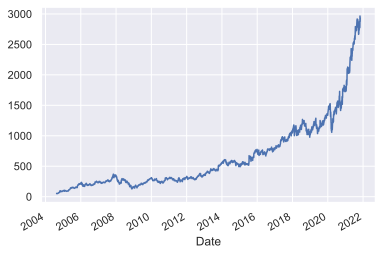

In [49]:
# Use only cLosing prices
goog.plot();

In [47]:
# Visualization setup
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles
%config InlineBackend.figure_format = 'svg'

In [50]:
# plotting

In [54]:
# Resampling (down sampling)
# goog.resample('Q').mean()
goog.resample('Q').median()

# Resampling (up sampling)
goog.resample('H').max()

Date
2004-08-19 00:00:00      49.982655
2004-08-19 01:00:00            NaN
2004-08-19 02:00:00            NaN
2004-08-19 03:00:00            NaN
2004-08-19 04:00:00            NaN
                          ...     
2021-11-02 20:00:00            NaN
2021-11-02 21:00:00            NaN
2021-11-02 22:00:00            NaN
2021-11-02 23:00:00            NaN
2021-11-03 00:00:00    2935.800049
Freq: H, Name: Close, Length: 150841, dtype: float64

In [ ]:
# Visualization of resampled data

In [56]:
goog = goog.asfreq('D', method = 'pad')
print(goog)

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-21      53.952770
2004-08-22      53.952770
2004-08-23      54.495735
                 ...     
2021-10-30    2965.409912
2021-10-31    2965.409912
2021-11-01    2875.479980
2021-11-02    2917.260010
2021-11-03    2935.800049
Freq: D, Name: Close, Length: 6286, dtype: float64


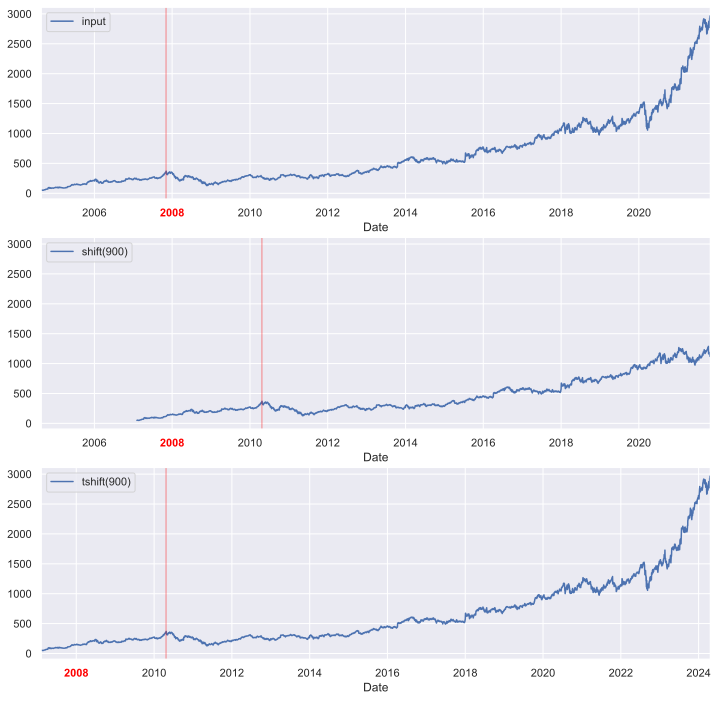

In [61]:
"""
Time - shifts
"""

# shift() and tshift() by 900 days

fig, ax = plt.subplots(3, sharey=True, figsize = (12,12))

# Apply a frequency to the data
goog = goog.asfreq('D', method = 'pad') # 'pad' = forward fill NaN values

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

#Legends  and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc = 2)
ax[0].get_xticklabels()[2].set(weight='heavy',color = 'red')
ax[0].axvline(local_max, alpha = 0.3, color = 'red')

ax[1].legend(['shift(900)'], loc = 2)
ax[1].get_xticklabels()[2].set(weight = 'heavy', color = 'red')
ax[1].axvline(local_max + offset, alpha = 0.3, color = 'red')

ax[2].legend(['tshift(900)'], loc = 2)
ax[2].get_xticklabels()[1].set(weight = 'heavy', color = 'red')
ax[2].axvline(local_max + offset, alpha = 0.3, color = 'red')

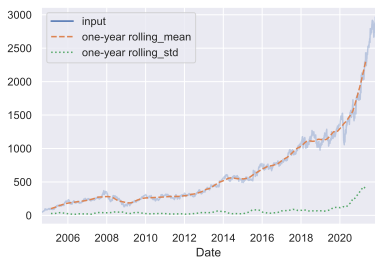

In [63]:
"""
Rolling Windows
"""

rolling = goog.rolling(365, center = True)

data = pd.DataFrame({'input' : goog,
                    'one-year rolling_mean' : rolling.mean(),
                    'one-year rolling_std' : rolling.std()})
ax = data.plot(style = ['-','--',':'])
ax.lines[0].set_alpha(0.3)